<a href="https://colab.research.google.com/github/Prakriti-Sahu/FoML/blob/main/assign_5_prog_ques_1_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASSIGNMENT-5  (PROGRAMMING QUESTIONS)**

#**Q1. CLUSTERING**

**Importing data**

In [1]:
!wget https://raw.githubusercontent.com/Prakriti-Sahu/FoML/main/dataset1.txt

--2021-11-26 15:45:30--  https://raw.githubusercontent.com/Prakriti-Sahu/FoML/main/dataset1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15570 (15K) [text/plain]
Saving to: ‘dataset1.txt’

dataset1.txt        100%[===================>]  15.21K  --.-KB/s    in 0s      

2021-11-26 15:45:30 (72.8 MB/s) - ‘dataset1.txt’ saved [15570/15570]



In [2]:
!wget https://raw.githubusercontent.com/Prakriti-Sahu/FoML/main/dataset2.txt

--2021-11-26 15:45:30--  https://raw.githubusercontent.com/Prakriti-Sahu/FoML/main/dataset2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14913 (15K) [text/plain]
Saving to: ‘dataset2.txt’

dataset2.txt        100%[===================>]  14.56K  --.-KB/s    in 0s      

2021-11-26 15:45:30 (32.0 MB/s) - ‘dataset2.txt’ saved [14913/14913]



**Importing necessary libraries**

In [3]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

**Reading data**

DATASET 1

In [4]:
col1 = ['A', 'B']
data1 = pd.read_csv("dataset1.txt", sep=" ", names=col1, header=None)
data1.head()

,A,B
0,1.489034,-0.372265
1,-0.993560,0.113308
2,1.375386,-0.426868
3,-0.856408,0.516299
4,0.446398,-0.332782


DATASET 2

In [5]:
col2 = ['A', 'B']
data2 = pd.read_csv("dataset2.txt", sep=" ", names=col2, header=None)
data2.head()

,A,B
0,9.359071,0.337273
1,-1.136104,4.229264
2,-1.818084,4.651985
3,-8.952252,5.983762
4,-6.636040,5.606801


## **Part a)**

**VISUALIZING DATASET 1**

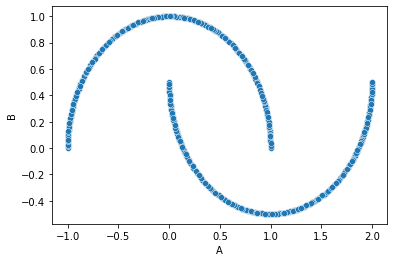

In [6]:
sns.scatterplot(data=data1, x=data1.A, y=data1.B, palette='bright')

**Plotting clusters from k=1 to k=10**

-------------------1 clusters--------------------


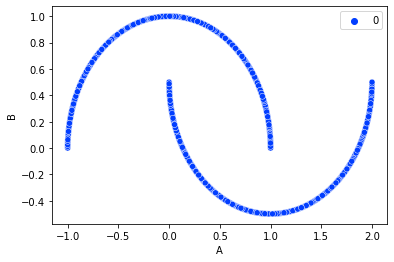

-------------------2 clusters--------------------


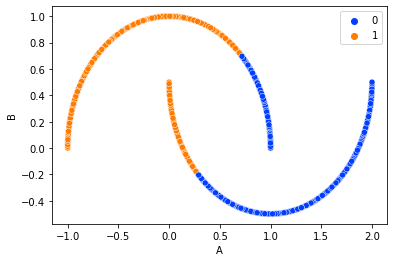

-------------------3 clusters--------------------


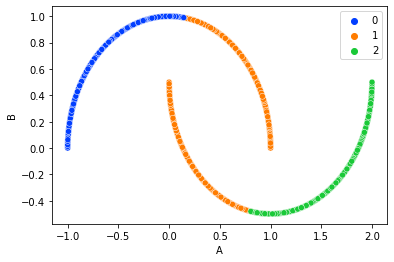

-------------------4 clusters--------------------


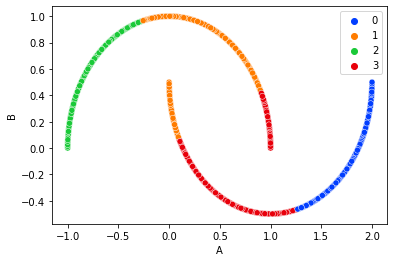

-------------------5 clusters--------------------


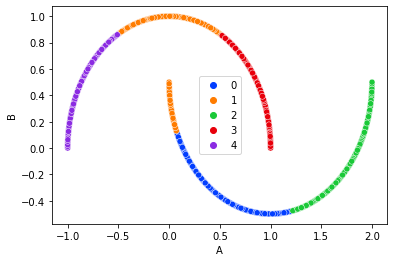

-------------------6 clusters--------------------


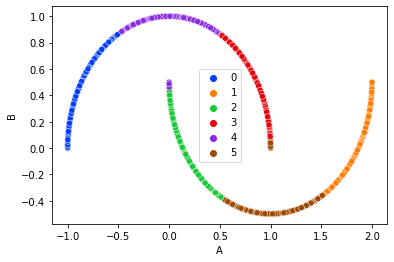

-------------------7 clusters--------------------


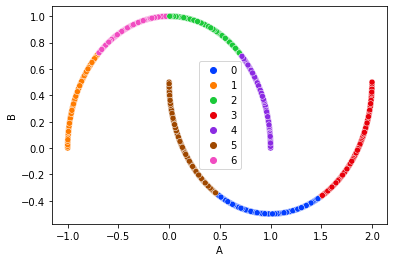

-------------------8 clusters--------------------


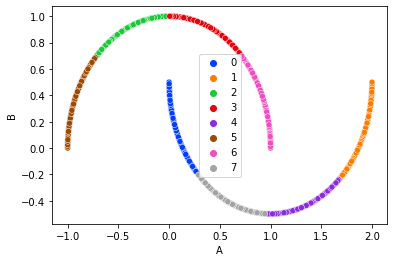

-------------------9 clusters--------------------


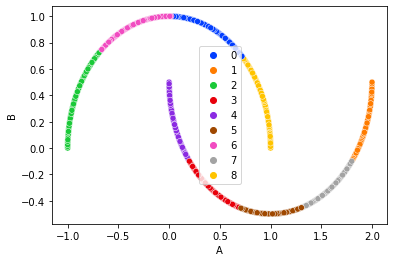

In [19]:
d=[]
k = range(1,10)
for i in k:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(data1)
  d.append(kmeans.inertia_)
  print(f"-------------------{i} clusters--------------------")
  ax = sns.scatterplot(data=data1,x=data1.A,y=data1.B,hue=kmeans.labels_,palette='bright')
  plt.show()

**Elbow Method to test optimal clusters**

We see the elbow at k=2, implying that optimal number of clusters is 2.

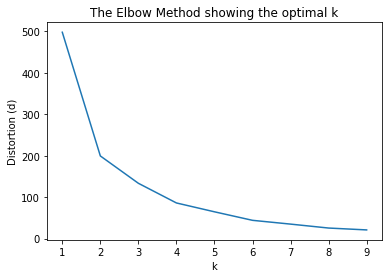

In [20]:
plt.plot(k, d)
plt.xlabel('k')
plt.ylabel('Distortion (d)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Gap Statistic for K means**

The biggest jump in gap statistic score is seen at k=2 (after which it drops significantly), implying that k=2 is the optimal clustering.

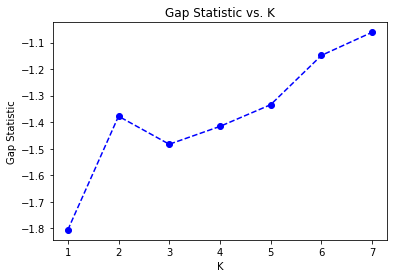

In [22]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    data: dataset to be clustered
    nrefs: number of sample reference datasets to create
    maxClusters: Number of clusters to check
    Returns: (gaps, optimal K for clustering)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})

    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)

        for i in range(nrefs):            
            randomReference = np.random.random_sample(size=data.shape)          
            km = KMeans(k)
            km.fit(randomReference)            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        km = KMeans(k)
        km.fit(data)        
        origDisp = km.inertia_

        gap = np.log(np.mean(refDisps)) - np.log(origDisp)      # gap statistic calculation
        gaps[gap_index] = gap        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
        
    return (gaps.argmax() + 1, resultsdf)


# using gap statistic on original dataset
score_g, df = optimalK(data1, nrefs=2, maxClusters=8)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

## **Part b)**

**DBSCAN Implementation**

In [23]:
def MyDBSCAN(D, eps, MinPts):
    """
    D-dataset to be clustered
    eps- epsilon- threshold distance or radius of circle to consider neighbours in
    MinPts- Number of points to consider as neighbours    
    Returns list of cluster labels (label -1 means noise) numbered starting from 1.
    """
 
    labels = [0]*len(D)
    C = 0               # current cluster    
    for P in range(0, len(D)):
        if not (labels[P] == 0):
           continue
        NeighborPts = regionQuery(D, P, eps)       
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    return labels

In [24]:
def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    """
    D- dataset to be clustered
    labels- list to store cluster labels for all points
    P- index of seed point for new cluster
    NeighbhorPts- neighbors of P
    C- label of cluster to be grown
    eps- epsilon- threshold distance or radius of circle to consider neighbours in
    MinPts- Number of points to consider as neighbours    
    Returns complete cluster C
    """

    labels[P] = C    
    i = 0
    while i < len(NeighborPts):    
        Pn = NeighborPts[i]
       
        if labels[Pn] == -1:
           labels[Pn] = C
        elif labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
        i += 1        

In [25]:
def regionQuery(D, P, eps):
    """
    Find all points in dataset D within dist/radius eps of point P
    """
    neighbors = []
    for Pn in range(0, len(D)):
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)            
    return neighbors

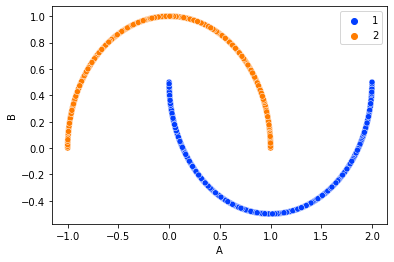

In [41]:
X_train=np.array(data1)
my_labels = MyDBSCAN(X_train, eps=0.5, MinPts=8)
sns.scatterplot(data=data1, x=data1.A, y=data1.B, hue=my_labels, palette='bright')

## **Part c)** 
Both k-means and DBSCAN give different plots for the same dataset with the same k (=2). More explanation in the report.

## **Part d)**

VISUALIZING DATASET 2 (Given in question that k=3)

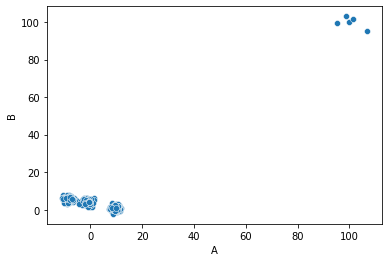

In [28]:
sns.scatterplot(data=data2, x=data2.A, y=data2.B, palette='bright')

**Using k-means clustering**

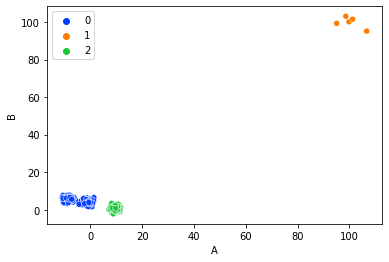

In [50]:
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(data2)
sns.scatterplot(data=data2,x=data2.A,y=data2.B,hue=kmeans2.labels_,palette='bright')

**Using DBSCAN method**

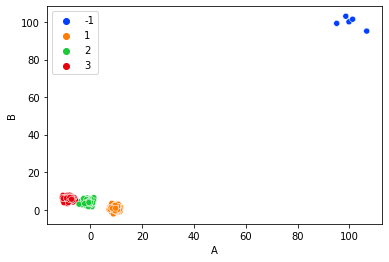

In [49]:
X_train2=np.array(data2)
my_labels2 = MyDBSCAN(X_train2, eps=1.4, MinPts=10)
sns.scatterplot(data=data2, x=data2.A, y=data2.B, hue=my_labels2, palette='bright')

**Pros and cons of k-means and DBSCAN are in the report.**